# Breast Cancer Classification

## Defining the Problem

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

# Models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
df = pd.DataFrame(data['data'], columns = data['feature_names'])
df['target'] = pd.Series(data['target'])

In [4]:
# Cleaning columns
df.columns = [x.replace(' ', '_') for x in df.columns]
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [5]:
features_df = df[df.columns.tolist()[:-1]].copy()
target_df = df['target'].copy()

In [6]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [7]:
# Creating subset dataframes for easier analysis
mean_df = df.filter(like = 'mean')
error_df = df.filter(like = 'error')
worst_df = df.filter(like = 'worst')

# Applying MinMaxScaler for each dataframe
scaler = MinMaxScaler()
scaled_mean_df = pd.DataFrame(scaler.fit_transform(mean_df), columns = mean_df.columns)
scaled_error_df = pd.DataFrame(scaler.fit_transform(error_df), columns = error_df.columns)
scaled_worst_df = pd.DataFrame(scaler.fit_transform(worst_df), columns = worst_df.columns)

In [8]:
df['target'].value_counts(normalize = True)

1    0.627417
0    0.372583
Name: target, dtype: float64

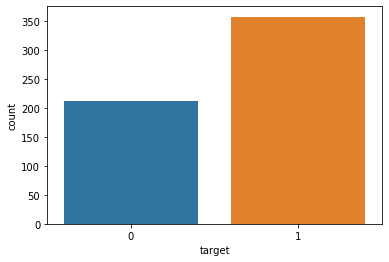

In [9]:
sns.countplot(df['target'])
plt.show()

In [10]:
def swarmplot(df, length, width, target_var, label1, label2):
    plt.figure(figsize = (length, width))
    melt_df = pd.melt(df, id_vars = target_var)
    sns.swarmplot(x = 'variable', y = 'value', hue = target_var, data = melt_df)
    plt.xticks(rotation = 90)
    plt.legend(loc = 'upper right')
    legend = plt.legend()
    legend.get_texts()[0].set_text(label1)
    legend.get_texts()[1].set_text(label2)
    plt.show()

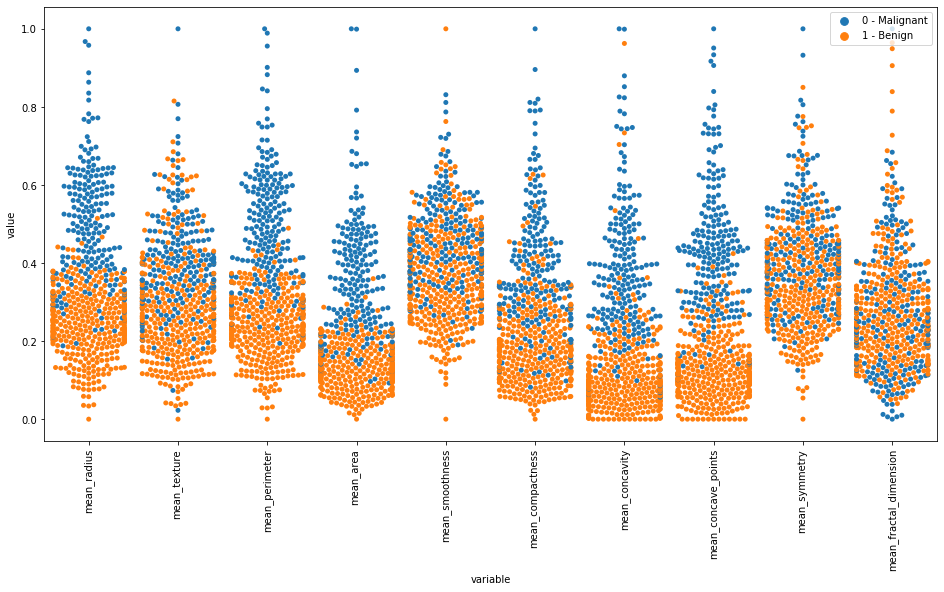

In [11]:
scaled_mean_df['target'] = df['target']
swarmplot(scaled_mean_df, 16, 8, 'target', '0 - Malignant', '1 - Benign')

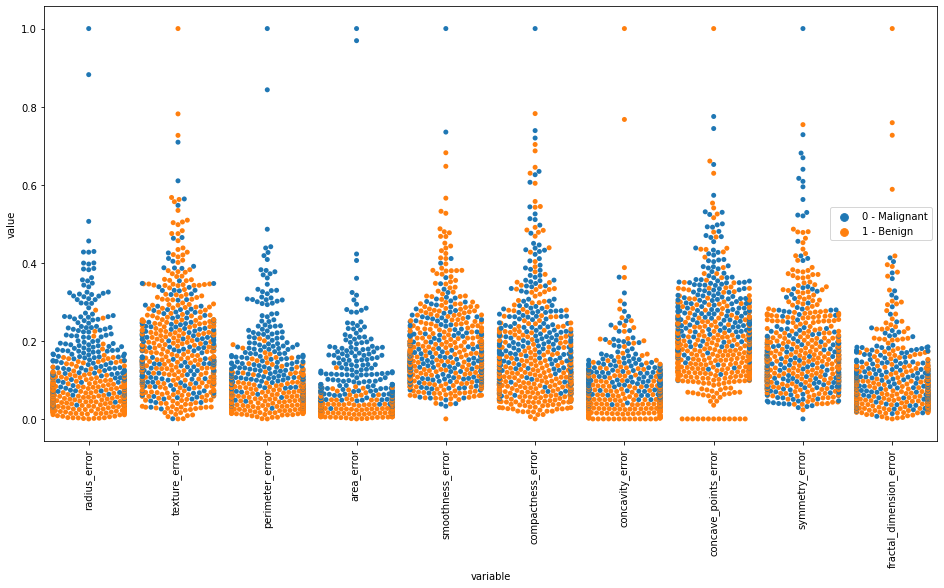

In [12]:
scaled_error_df['target'] = df['target']
swarmplot(scaled_error_df, 16, 8, 'target', '0 - Malignant', '1 - Benign')

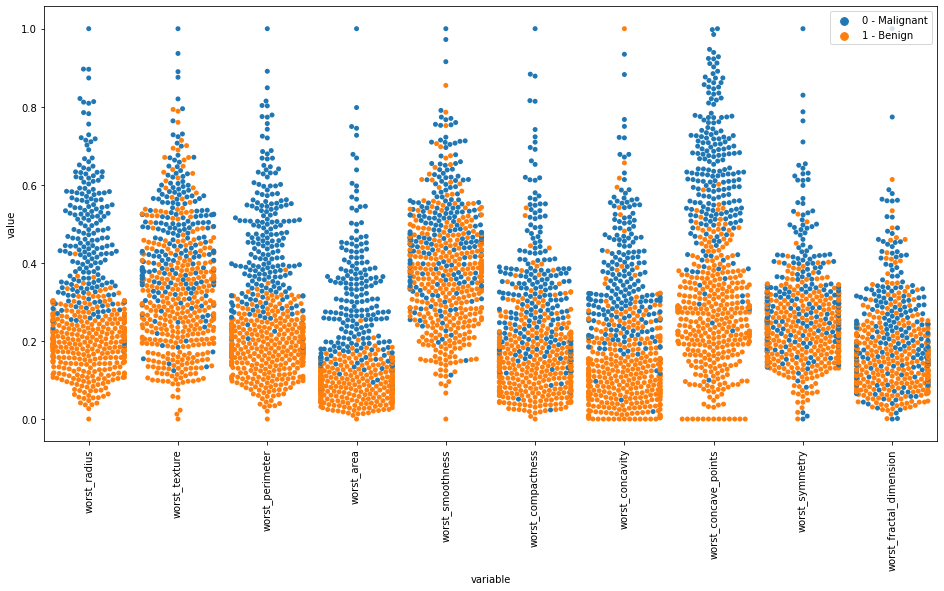

In [13]:
scaled_worst_df['target'] = df['target']
swarmplot(scaled_worst_df, 16, 8, 'target', '0 - Malignant', '1 - Benign')

In [14]:
#combined dataframe with scaled features
scaled_mean_df = scaled_mean_df.drop('target', axis = 1)
scaled_error_df = scaled_error_df.drop('target', axis = 1)
scaled_features_df = pd.concat([scaled_mean_df, scaled_error_df, scaled_worst_df], axis = 1)

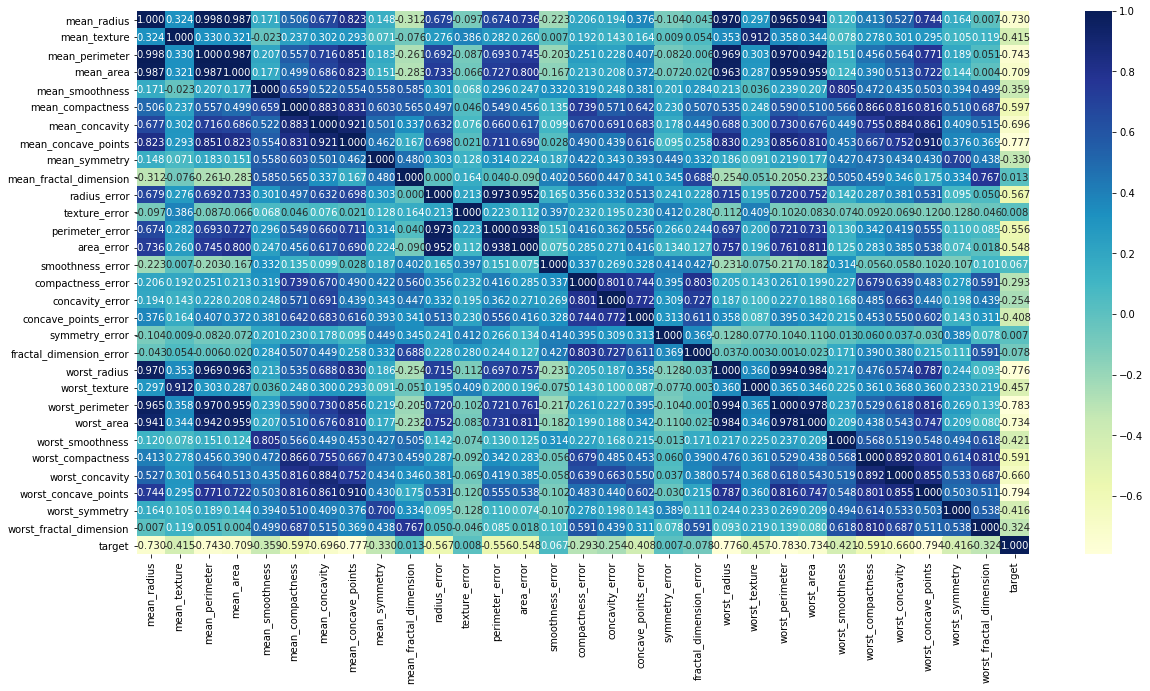

In [15]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True, fmt = '0.3f')
plt.show()

**Observation:** We see that from the correlation matrix, there are feature variables that are highly correlated with one another.  To reduce multicollinearity, we will remove some of these variables.  For example, mean_radius, mean_texture, and mean_perimeter have correlation values almost equal to 1 (which illustrates that they similar, if not identical, information).  We will keep `mean_perimeter` because it is the most correlated with the taret variable.

In [16]:
drop_cols = ['mean_radius', 'mean_perimeter', 'mean_compactness', 'mean_concavity', 'perimeter_error', 'radius_error',
            'compactness_error', 'concavity_error', 'worst_radius', 'worst_perimeter', 'worst_compactness', 'worst_concavity']

In [17]:
reduced_df = df.drop(drop_cols, axis = 1)

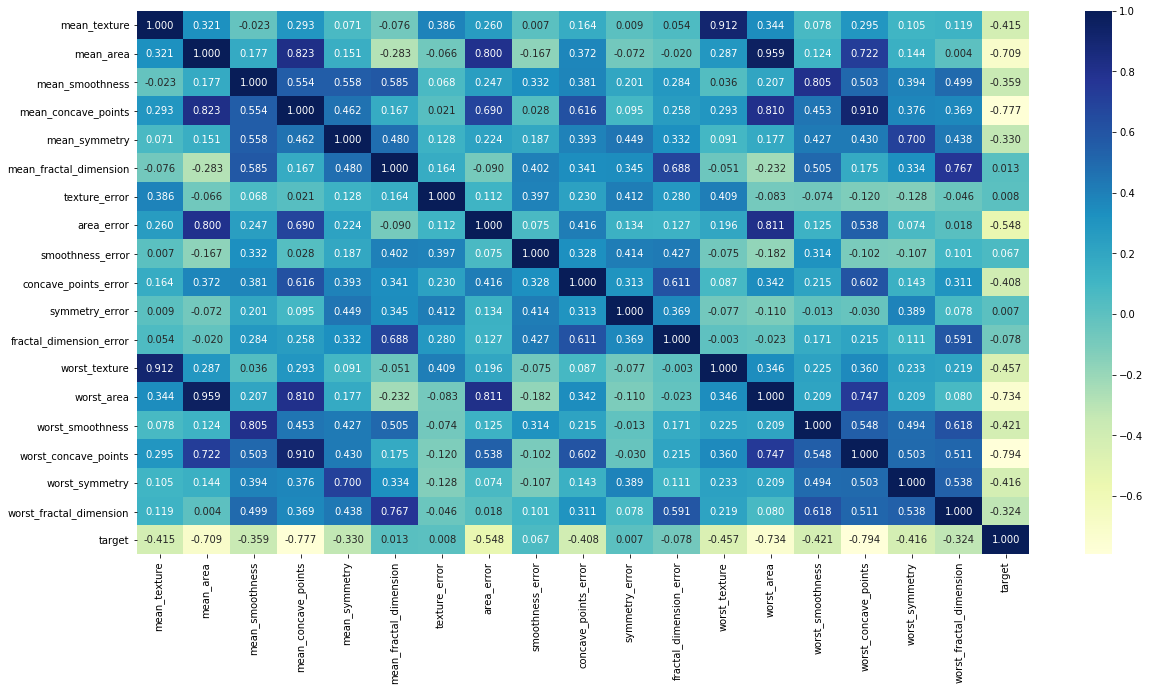

In [18]:
plt.figure(figsize = (20, 10))
sns.heatmap(reduced_df.corr(), cmap = 'YlGnBu', annot = True, fmt = '0.3f')
plt.show()

## Defining a Baseline Model

In [19]:
# Splitting Data in Train and Test Sets
x_base_train, x_base_test, y_base_train, y_base_test = train_test_split(features_df, target_df, 
                                                                       test_size = 0.40, random_state = 8)
# Defining classification models
models = list()
models.append(('Logistic Regression', LogisticRegression(random_state = 8, n_jobs = -1)))
models.append(('Naive Bayes Classifier', GaussianNB()))
models.append(('Stochiastic Gradient Descent', SGDClassifier(random_state = 8, n_jobs = -1)))
models.append(('K-Neighbors Classifier', KNeighborsClassifier(n_jobs = -1)))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(random_state = 8)))
models.append(('Random Forest Classifier', RandomForestClassifier(random_state = 8, n_jobs = -1)))
models.append(('Support Vector Classifier', SVC(random_state = 8)))

# Defining Dataframe to store values
baseline_results = pd.DataFrame(columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC AUC'])

# Defining a counter for loop
i = 0

for name, model in models:
    m = model
    m.fit(x_base_train, y_base_train)
    baseline_results.loc[i] = [name, 
                              round(accuracy_score(y_base_test, model.predict(x_base_test)), 4), 
                             round(f1_score(y_base_test, model.predict(x_base_test)), 4),
                             round(precision_score(y_base_test, model.predict(x_base_test)), 4),
                             round(recall_score(y_base_test, model.predict(x_base_test)), 4),
                             round(roc_auc_score(y_base_test, model.predict(x_base_test)), 4)]
    i += 1
    
baseline_results

,Model,Accuracy,F1,Precision,Recall,ROC AUC
0,Logistic Regression,0.9430,0.9541,0.9441,0.9643,0.9367
1,Naive Bayes Classifier,0.9386,0.9507,0.9375,0.9643,0.9310
2,Stochiastic Gradient Descent,0.9298,0.9448,0.9133,0.9786,0.9154
3,K-Neighbors Classifier,0.9386,0.9510,0.9315,0.9714,0.9289
4,Decision Tree Classifier,0.9211,0.9362,0.9296,0.9429,0.9146
5,Random Forest Classifier,0.9518,0.9617,0.9388,0.9857,0.9417
6,Support Vector Classifier,0.9298,0.9452,0.9079,0.9857,0.9133


**Observation:** Looking at our baseline models, we see that the data fits nicely to various classification models.  The Randoom Forest Classifier works best for modeling.  We will use this model type for further analysis.

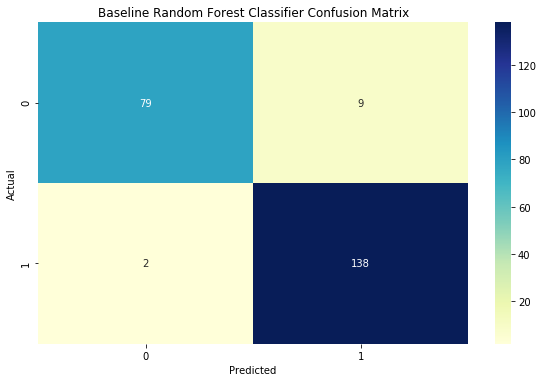

Test Set Accuracy = 95.18 %


In [20]:
## Random Forest Classifier Confusion Matrix
rf_clf = RandomForestClassifier(random_state = 8, n_jobs = -1)
rf_clf.fit(x_base_train, y_base_train)
baseline_confusion_matrix = confusion_matrix(y_base_test, rf_clf.predict(x_base_test))

## Creating Heatmap
plt.figure(figsize = (8, 5))
sns.heatmap(pd.DataFrame(baseline_confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Baseline Random Forest Classifier Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print('Test Set Accuracy =', round(rf_clf.score(x_base_test, y_base_test)*100, 2), '%')

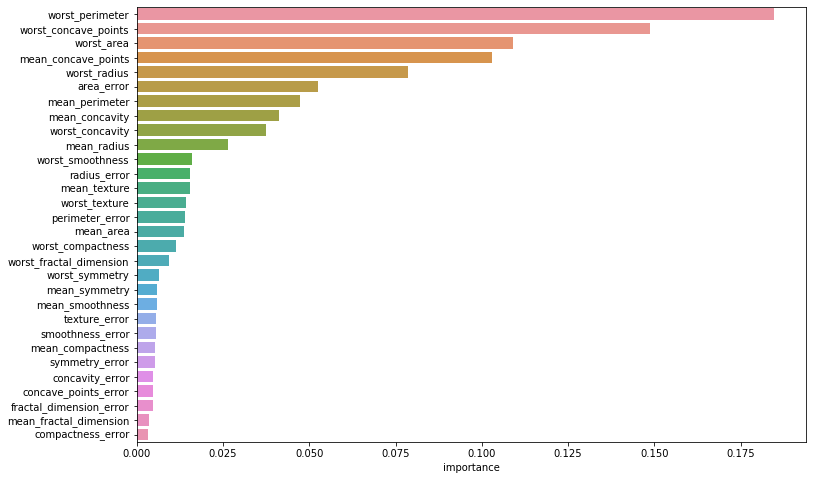

In [21]:
# Plotting Feature Importances

rf_clf_feature_importances = pd.DataFrame(rf_clf.feature_importances_, index = x_base_train.columns,
                                         columns = ['importance']).sort_values('importance', ascending = False)
plt.figure(figsize = (12, 8))
sns.barplot(x = 'importance', y = rf_clf_feature_importances.index,
            data = rf_clf_feature_importances)
plt.show()

In [22]:
results = pd.DataFrame(columns = ['Number of Features', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC AUC'])

for index in np.arange(len(x_base_train.columns)):
    sel = RFE(RandomForestClassifier(random_state = 8, n_jobs = -1), n_features_to_select = index + 1)
    sel.fit(x_base_train, y_base_train)
    x_train_rfe = sel.transform(x_base_train)
    x_test_rfe = sel.transform(x_base_test)
    model = RandomForestClassifier(n_estimators = 100, random_state = 8, n_jobs = -1)
    model.fit(x_train_rfe, y_base_train)
    results.loc[index] = [index + 1,
                         round(accuracy_score(y_base_test, model.predict(x_test_rfe)), 4), 
                         round(f1_score(y_base_test, model.predict(x_test_rfe)), 4),
                         round(precision_score(y_base_test, model.predict(x_test_rfe)), 4),
                         round(recall_score(y_base_test, model.predict(x_test_rfe)), 4),
                         round(roc_auc_score(y_base_test, model.predict(x_test_rfe)), 4)]
    
results

,Number of Features,Accuracy,F1,Precision,Recall,ROC AUC
0,1.0,0.8728,0.9010,0.8627,0.9429,0.8521
1,2.0,0.9474,0.9580,0.9384,0.9786,0.9381
2,3.0,0.9298,0.9444,0.9189,0.9714,0.9175
3,4.0,0.9518,0.9622,0.9272,1.0000,0.9375
4,5.0,0.9518,0.9619,0.9329,0.9929,0.9396
5,6.0,0.9386,0.9517,0.9200,0.9857,0.9247
6,7.0,0.9430,0.9550,0.9262,0.9857,0.9304
7,8.0,0.9430,0.9550,0.9262,0.9857,0.9304
8,9.0,0.9430,0.9550,0.9262,0.9857,0.9304
9,10.0,0.9474,0.9583,0.9324,0.9857,0.9360


**Observation:** Utilizing Reverse Feature Elimination, the best model from the Random Forest Classifier utilizes 14 out of the 30 features.

In [23]:
rf_rfe = RFE(RandomForestClassifier(random_state = 8, n_jobs = -1),
            n_features_to_select = 14)
rf_rfe.fit(x_base_train, y_base_train)
x_train_rfe = rf_rfe.transform(x_base_train)
x_test_rfe = rf_rfe.transform(x_base_test)
rfe_df = pd.DataFrame(x_train_rfe, columns = x_base_train.columns[rf_rfe.get_support()])

rfe_df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_concavity', 'mean_concave_points', 'area_error', 'worst_radius',
       'worst_texture', 'worst_perimeter', 'worst_area', 'worst_smoothness',
       'worst_concavity', 'worst_concave_points'],
      dtype='object')

In [24]:
simple_df = features_df[features_df.columns[rf_rfe.get_support()].tolist()].copy()
simple_df['target'] = pd.Series(data['target'])

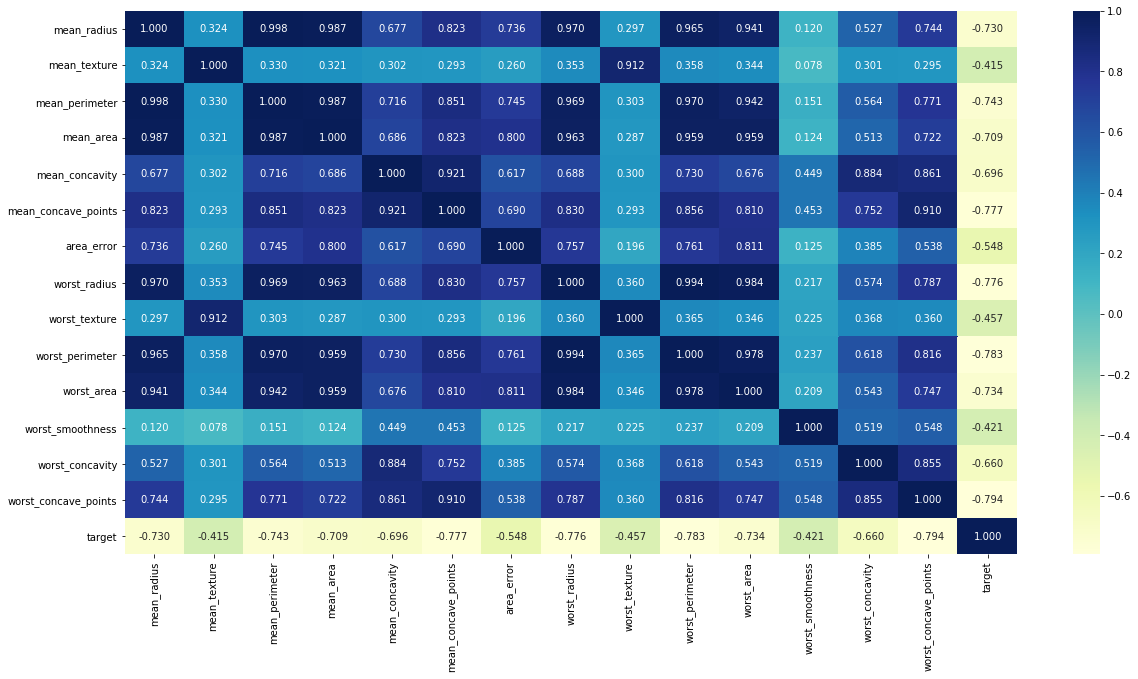

In [25]:
plt.figure(figsize = (20, 10))
sns.heatmap(simple_df.corr(), cmap = 'YlGnBu', annot = True, fmt = '0.3f')
plt.show()

**Observations:** There is plenty of correlation from features selected by RFE.  Highly correlated features can possibly lead to overfitting when the model was trained.  Let us try to develop a model with less correlation to alleviate this issue.

## Performing RFE with Reduced Features

In [32]:
# Splitting Data in Train and Test Sets
x_reduced_train, x_reduced_test, y_reduced_train, y_reduced_test = train_test_split(
                                                                    reduced_df[reduced_df.columns.tolist()[:-1]],
                                                                    target_df, 
                                                                    test_size = 0.40, 
                                                                    random_state = 8)

In [35]:
y_reduced_train

225    1
413    1
520    1
417    0
300    0
      ..
136    1
133    1
361    1
340    1
451    0
Name: target, Length: 341, dtype: int32

In [29]:
x_reduced_train

,mean_texture,mean_area,mean_smoothness,mean_concave_points,mean_symmetry,mean_fractal_dimension,texture_error,area_error,smoothness_error,concave_points_error,symmetry_error,fractal_dimension_error,worst_texture,worst_area,worst_smoothness,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
225,13.47,641.2,0.09906,0.04603,0.2075,0.05448,0.8121,48.29,0.007089,0.012860,0.02266,0.001463,16.90,873.2,0.1297,0.10870,0.3062,0.06072,1
413,22.11,693.7,0.08515,0.03876,0.1944,0.05913,1.3360,28.51,0.004449,0.011960,0.01906,0.004015,31.55,867.1,0.1077,0.13080,0.3163,0.09251,1
520,13.90,257.8,0.13710,0.02421,0.2197,0.07696,1.1300,19.63,0.015460,0.015800,0.03997,0.003901,17.84,326.6,0.1850,0.07262,0.3681,0.08982,1
417,21.08,803.1,0.11200,0.08481,0.2085,0.06864,1.2130,176.50,0.008198,0.021390,0.02018,0.005815,27.65,1748.0,0.1517,0.21340,0.3003,0.10480,0
300,18.90,1217.0,0.11500,0.10620,0.1792,0.06552,1.1610,133.00,0.006056,0.017330,0.01884,0.004787,26.24,2053.0,0.1495,0.19800,0.2968,0.09929,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,16.67,423.6,0.10510,0.02600,0.1339,0.05945,2.5080,34.37,0.006578,0.013070,0.01359,0.003707,25.48,546.7,0.1271,0.06968,0.1712,0.07343,1
133,13.93,761.7,0.09462,0.05933,0.1816,0.05723,0.8155,27.94,0.005217,0.012680,0.01669,0.002330,19.25,922.8,0.1223,0.13740,0.2723,0.07071,1
361,21.57,546.1,0.08582,0.02424,0.1815,0.05696,1.5390,20.98,0.005498,0.006399,0.01829,0.001956,29.20,621.2,0.1140,0.05614,0.2637,0.06658,1
340,16.54,641.2,0.09751,0.04223,0.1912,0.06412,0.7706,32.14,0.004577,0.012430,0.01873,0.003373,21.51,862.1,0.1294,0.14140,0.3053,0.08764,1


In [36]:
reduced_results = pd.DataFrame(columns = ['Number of Features', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC AUC'])

for index in np.arange(len(reduced_df.columns)):
    sel = RFE(RandomForestClassifier(random_state = 8, n_jobs = -1), n_features_to_select = index + 1)
    sel.fit(x_reduced_train, y_reduced_train)
    x_train_rfe = sel.transform(x_reduced_train)
    x_test_rfe = sel.transform(x_reduced_test)
    model = RandomForestClassifier(n_estimators = 100, random_state = 8, n_jobs = -1)
    model.fit(x_train_rfe, y_base_train)
    reduced_results.loc[index] = [index + 1,
                         round(accuracy_score(y_reduced_test, model.predict(x_test_rfe)), 4), 
                         round(f1_score(y_reduced_test, model.predict(x_test_rfe)), 4),
                         round(precision_score(y_reduced_test, model.predict(x_test_rfe)), 4),
                         round(recall_score(y_reduced_test, model.predict(x_test_rfe)), 4),
                         round(roc_auc_score(y_reduced_test, model.predict(x_test_rfe)), 4)]
    
reduced_results

,Number of Features,Accuracy,F1,Precision,Recall,ROC AUC
0,1.0,0.8728,0.9010,0.8627,0.9429,0.8521
1,2.0,0.9342,0.9477,0.9252,0.9714,0.9232
2,3.0,0.9561,0.9655,0.9333,1.0000,0.9432
3,4.0,0.9386,0.9521,0.9145,0.9929,0.9226
4,5.0,0.9474,0.9586,0.9267,0.9929,0.9339
5,6.0,0.9737,0.9790,0.9589,1.0000,0.9659
6,7.0,0.9737,0.9790,0.9589,1.0000,0.9659
7,8.0,0.9781,0.9825,0.9655,1.0000,0.9716
8,9.0,0.9693,0.9756,0.9524,1.0000,0.9602
9,10.0,0.9693,0.9756,0.9524,1.0000,0.9602


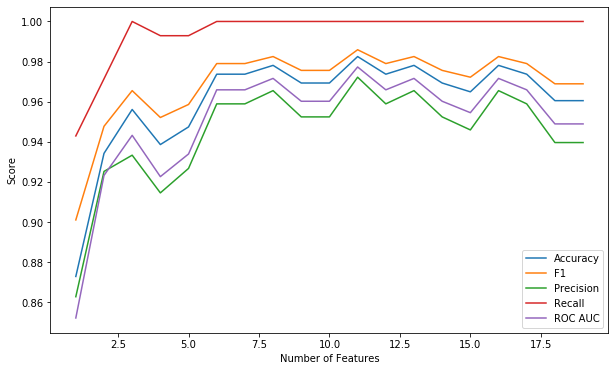

In [38]:
plt.figure(figsize = (10, 6))
for column in reduced_results.columns[1:]:
    plt.plot(reduced_results[reduced_results.columns[0]], reduced_results[column], label = column)
plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.legend(loc = 'lower right')
plt.show()

In [44]:
rf_rfe_2 = RFE(RandomForestClassifier(random_state = 8, n_jobs = -1),
            n_features_to_select = 11)
rf_rfe_2.fit(x_reduced_train, y_reduced_train)
x_train_rfe_2 = rf_rfe_2.transform(x_reduced_train)
x_test_rfe_2 = rf_rfe_2.transform(x_reduced_test)
rfe_df_2 = pd.DataFrame(x_train_rfe_2, columns = x_reduced_train.columns[rf_rfe_2.get_support()])

In [45]:
rfe_df_2.columns

Index(['mean_texture', 'mean_area', 'mean_concave_points', 'area_error',
       'concave_points_error', 'worst_texture', 'worst_area',
       'worst_smoothness', 'worst_concave_points', 'worst_symmetry',
       'worst_fractal_dimension'],
      dtype='object')

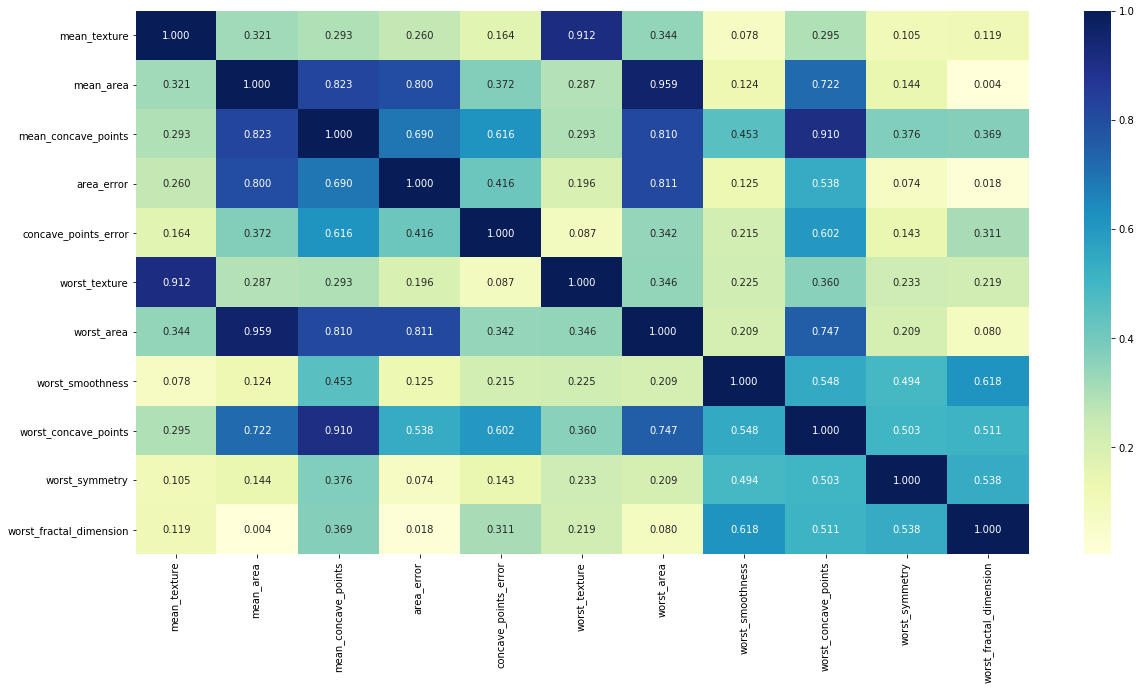

In [63]:
reduced_features_df = reduced_df.drop('target', axis = 1)
simple_df_2 = reduced_features_df[reduced_features_df.columns[rf_rfe_2.get_support()].tolist()]

plt.figure(figsize = (20, 10))
sns.heatmap(simple_df_2.corr(), cmap = 'YlGnBu', annot = True, fmt = '0.3f')
plt.show()

In [65]:
def random_forest_results(x_train, x_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators = 100, random_state = 8, n_jobs = -1)
    clf.fit(x_train, y_train)
    print('Accuracy:', round(accuracy_score(y_test, clf.predict(x_test)), 4))
    print('F1 Score:', round(f1_score(y_test, clf.predict(x_test)), 4))
    print('Precision Score:', round(precision_score(y_test, clf.predict(x_test)), 4))
    print('Recall Score:', round(recall_score(y_test, clf.predict(x_test)), 4))
    print('ROC AUC Score:', round(roc_auc_score(y_test, clf.predict(x_test)), 4))

In [67]:
random_forest_results(x_reduced_train, x_reduced_test, y_reduced_train, y_reduced_test)

Accuracy: 0.9605
F1 Score: 0.9689
Precision Score: 0.9396
Recall Score: 1.0
ROC AUC Score: 0.9489


In [76]:
sel_best = RFE(RandomForestClassifier(n_estimators = 100, random_state = 8, n_jobs = -1),
            n_features_to_select = 11)
sel_best.fit(x_reduced_train, y_reduced_train)
x_train_best = sel_best.transform(x_reduced_train)
x_test_best = sel_best.transform(x_reduced_test)

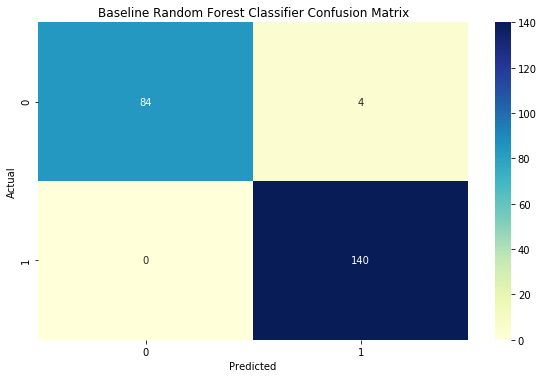

Test Set Accuracy = 98.25 %


In [78]:
## Random Forest Classifier Confusion Matrix
rf_clf_best = RandomForestClassifier(random_state = 8, n_jobs = -1)
rf_clf_best.fit(x_train_best, y_reduced_train)
baseline_confusion_matrix = confusion_matrix(y_reduced_test, rf_clf_best.predict(x_test_best))

## Creating Heatmap
plt.figure(figsize = (8, 5))
sns.heatmap(pd.DataFrame(baseline_confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Baseline Random Forest Classifier Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print('Test Set Accuracy =', round(rf_clf_best.score(x_test_best, y_reduced_test)*100, 2), '%')